In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

X = np.array([[0, 0, 0], [0, 0, 1],[0, 1, 0],[0, 1, 1],[1, 0, 0],[1, 0, 1]])
y = np.array([[0],[1],[0],[1],[0],[1]])

model = Sequential()

model.add(Dense(input_shape=(3,), units=4, activation='relu'))

model.add(Dense(units=4, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [2]:
history = model.fit(X, y, epochs=300, batch_size=2)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7708 - loss: 0.6272
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5833 - loss: 0.6111
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7708 - loss: 0.5929
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5833 - loss: 0.6274
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8333 - loss: 0.5547
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4583 - loss: 0.6445    
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6458 - loss: 0.6299
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6458 - loss: 0.5820
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7708 - loss: 0.5313
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8333 - loss: 0.5561
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6458 - loss: 0.5720
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5833 

In [3]:
loss, accuracy = model.evaluate(X, y)
print('Accuracy:', round(accuracy,2)*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 1.0000 - loss: 0.0407
Accuracy: 100.0


In [4]:
y_pred = model.predict(X)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.10122146]
 [0.98465043]
 [0.0482799 ]
 [0.982576  ]
 [0.03603203]
 [0.9820203 ]]


In [5]:
threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)
print(y_pred_class)

[[0]
 [1]
 [0]
 [1]
 [0]
 [1]]


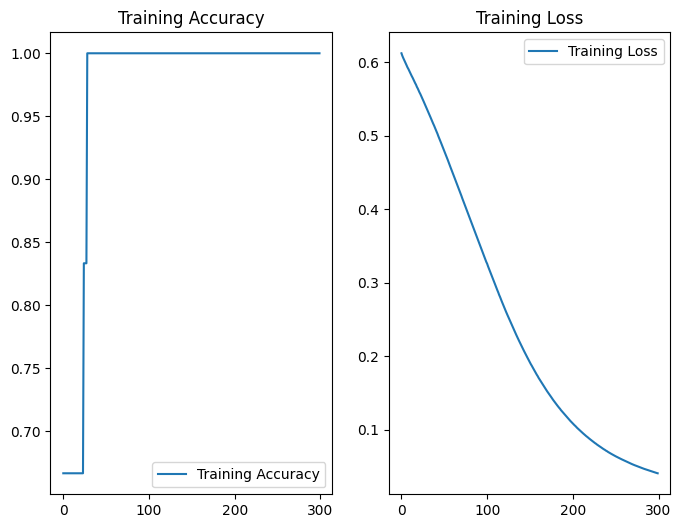

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss=history.history['loss']

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()